In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score, recall_score, f1_score, roc_curve, roc_auc_score
import pandas as pd
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics

In [36]:
def plot_roc_curve(y_train, preds_train, y_test, preds_test):
    plt.plot(metrics.roc_curve(y_train, preds_train)[0], metrics.roc_curve(y_train, preds_train)[1],
             color = 'red', label='Train ROC Curve (area = %0.5f)' % roc_auc_score(y_train, preds_train))
    plt.plot(metrics.roc_curve(y_test, preds_test)[0],metrics.roc_curve(y_test, preds_test)[1],
             color = 'blue', label='Test ROC Curve (area = %0.5f)' % roc_auc_score(y_test, preds_test))
    plt.plot([0, 2], [0, 2], color='black', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC')
    plt.legend()
    plt.show()
    sns.set(style='white', rc={'figure.figsize':(10,10)})

In [37]:
def important_stats(y_true, y_pred_proba, summary):
    print("------------------------------------------")
    y_pred_label = pd.Series(y_pred_proba)
    y_pred_label = y_pred_label.map(lambda x: 1 if x > 0.5 else 0)
    print(summary)
    reacll = recall_score(y_true, y_pred_label)
    print('recall:', reacll)
    f1_stat = f1_score(y_true, y_pred_label)
    print('f1_score:', f1_stat)
    accuracyScore= accuracy_score(y_true, y_pred_label)
    print('accuracy_score:', accuracyScore)
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_proba)
    auc = metrics.auc(fpr, tpr)
    print('AUC:', auc)
    matrix = pd.crosstab(y_true, y_pred_label, rownames=['True'], colnames=['Predicted'], margins=True)
    print(matrix)
    print("------------------------------------------")

In [38]:
df = pd.read_csv('c:/Users/14124/Desktop/cleaned_match_data.csv')

In [39]:
df.head()

,Unnamed: 0,match_id,duration,result,top_towers,mid_towers,bottom_towers,ancient_status,top_barracks,mid_barracks,...,tower_damage_std,level_total,level_max,level_min,level_std,gold_buyback_avg,gold_buyback_max,gold_buyback_min,gold_buyback_std,teamfight_loss
0,0,0,2375,1,1,3,2,2,0,2,...,2222.8977,100,24,16,3.0332,-414.2,0.0,-1056.0,507.4550,1
1,1,0,2375,0,-1,-3,-2,-2,0,-2,...,964.9754,84,19,12,2.6382,-668.4,0.0,-2240.0,884.9065,11
2,2,1,2582,0,-2,-2,-1,-2,-2,-2,...,625.7507,92,25,12,4.4091,-355.0,0.0,-1112.0,410.7768,10
3,3,1,2582,1,2,2,1,2,2,2,...,1980.6290,111,25,20,2.3152,-342.4,0.0,-1392.0,539.2356,2
4,4,2,2716,0,-1,-2,-1,-2,-2,0,...,540.7371,80,19,13,2.1909,0.0,0.0,0.0,0.0000,8


In [40]:
df.shape

(97340, 53)

In [41]:
df.dtypes

Unnamed: 0              int64
match_id                int64
duration                int64
result                  int64
top_towers              int64
mid_towers              int64
bottom_towers           int64
ancient_status          int64
top_barracks            int64
mid_barracks            int64
bottom_barracks         int64
gold_total              int64
gold_max                int64
gold_min                int64
gold_std              float64
gold_spent_avg        float64
gold_spent_max          int64
gold_spent_min          int64
gold_spent_std        float64
kills_total             int64
deaths_total            int64
deaths_max              int64
deaths_min              int64
deaths_std            float64
assists_avg           float64
assists_max             int64
assists_min             int64
assists_std           float64
denies_avg            float64
denies_max              int64
denies_min              int64
denies_std            float64
last_hits_avg         float64
last_hits_

In [42]:
df = df.drop(columns = ['match_id','Unnamed: 0'])

In [43]:
df.corr()

,duration,result,top_towers,mid_towers,bottom_towers,ancient_status,top_barracks,mid_barracks,bottom_barracks,gold_total,...,tower_damage_std,level_total,level_max,level_min,level_std,gold_buyback_avg,gold_buyback_max,gold_buyback_min,gold_buyback_std,teamfight_loss
duration,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230393,...,0.199976,0.867515,0.776659,0.780951,0.063224,-0.585446,-0.213387,-0.602820,0.582075,0.242865
result,0.000000,1.000000,0.780383,0.869118,0.825150,0.986854,0.809060,0.865912,0.942937,0.739364,...,0.747727,0.320451,0.318160,0.293043,0.059134,0.189747,0.061800,0.161707,-0.154202,-0.565127
top_towers,0.000000,0.780383,1.000000,0.807993,0.792817,0.790515,0.880296,0.752830,0.787292,0.548155,...,0.696751,0.278441,0.296039,0.246086,0.088415,0.141131,0.036464,0.121163,-0.118319,-0.517812
mid_towers,0.000000,0.869118,0.807993,1.000000,0.856399,0.880309,0.738982,0.801978,0.914213,0.613872,...,0.716737,0.324320,0.338086,0.292913,0.083000,0.142121,0.024963,0.131729,-0.133516,-0.609846
bottom_towers,0.000000,0.825150,0.792817,0.856399,1.000000,0.836555,0.735891,0.903572,0.836020,0.581170,...,0.718511,0.296908,0.312002,0.265209,0.084615,0.151632,0.039077,0.132218,-0.129588,-0.555111
ancient_status,0.000000,0.986854,0.790515,0.880309,0.836555,1.000000,0.817134,0.876071,0.955101,0.734006,...,0.756342,0.322183,0.321548,0.293756,0.062804,0.187248,0.054420,0.161586,-0.155769,-0.571964
top_barracks,0.000000,0.809060,0.880296,0.738982,0.735891,0.817134,1.000000,0.771422,0.793796,0.602863,...,0.711382,0.263630,0.268691,0.235660,0.066975,0.156431,0.043244,0.131539,-0.125817,-0.473552
mid_barracks,0.000000,0.865912,0.752830,0.801978,0.903572,0.876071,0.771422,1.000000,0.854986,0.643068,...,0.739327,0.288824,0.292350,0.260677,0.065643,0.169189,0.047936,0.144604,-0.139372,-0.519806
bottom_barracks,0.000000,0.942937,0.787292,0.914213,0.836020,0.955101,0.793796,0.854986,1.000000,0.697307,...,0.752436,0.321704,0.324197,0.292217,0.067838,0.175141,0.039243,0.156719,-0.154454,-0.580592
gold_total,0.230393,0.739364,0.548155,0.613872,0.581170,0.734006,0.602863,0.643068,0.697307,1.000000,...,0.627462,0.449840,0.421394,0.408975,0.054353,0.029177,-0.007021,0.016350,-0.021104,-0.376337


In [44]:
#Drop highly correlated features
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column]>0.6)]
df.drop(to_drop,axis=1,inplace=True)
df.head()

,duration,result,deaths_total,denies_avg,denies_min,level_std,gold_buyback_avg,gold_buyback_max
0,2375,1,17,6.0,1,3.0332,-414.2,0.0
1,2375,0,52,7.6,0,2.6382,-668.4,0.0
2,2582,0,53,5.4,0,4.4091,-355.0,0.0
3,2582,1,37,3.2,0,2.3152,-342.4,0.0
4,2716,0,49,2.0,0,2.1909,0.0,0.0


In [45]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['result','duration']),
                                                    df['result'],
                                                    test_size=0.2,
                                                    random_state=1)

In [46]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

## XGBoost

In [47]:
xgb = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                      n_estimators=100, max_depth=3)
xgb = xgb.fit(x_train, y_train)
y_pred_test = xgb.predict_proba(x_test)[:, 1]
y_pred_train = xgb.predict_proba(x_train)[:, 1]
important_stats(y_train, y_pred_train, "train result summary: ")
important_stats(y_test, y_pred_test, "test result summary: ")

------------------------------------------
train result summary: 
recall: 0.6944017914267434
f1_score: 0.7570272720931854
accuracy_score: 0.7763295182753583
AUC: 0.8543411418781921
Predicted      0      1    All
True                          
0          11478   8277  19755
1          11592   8448  20040
All        23070  16725  39795
------------------------------------------
------------------------------------------
test result summary: 
recall: 0.6890946502057613
f1_score: 0.7526265520534862
accuracy_score: 0.7738339839737004
AUC: 0.8508353301553047
Predicted     0     1   All
True                       
0          1135   838  1973
1          1189   848  2037
All        2324  1686  4010
------------------------------------------


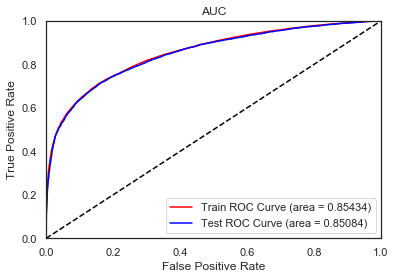

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plot_roc_curve(y_train, y_pred_train, y_test, y_pred_test)

## GBDT

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(random_state=0, n_estimators=10, max_depth=10)
gbdt = model.fit(x_train, y_train)
y_pred_test = gbdt.predict_proba(x_test)[:, 1]
y_pred_train = gbdt.predict_proba(x_train)[:, 1]
important_stats(y_train, y_pred_train, "train result summary: ")
important_stats(y_test, y_pred_test, "test result summary: ")

------------------------------------------
train result summary: 
recall: 0.7420345489443378
f1_score: 0.798032098807906
accuracy_score: 0.8115318554665554
AUC: 0.8889474527863686
Predicted      0      1    All
True                          
0          11269   8486  19755
1          11325   8715  20040
All        22594  17201  39795
------------------------------------------
------------------------------------------
test result summary: 
recall: 0.7008230452674897
f1_score: 0.7523746410426332
accuracy_score: 0.769673310047257
AUC: 0.8451896062672347
Predicted     0     1   All
True                       
0          1107   866  1973
1          1154   883  2037
All        2261  1749  4010
------------------------------------------


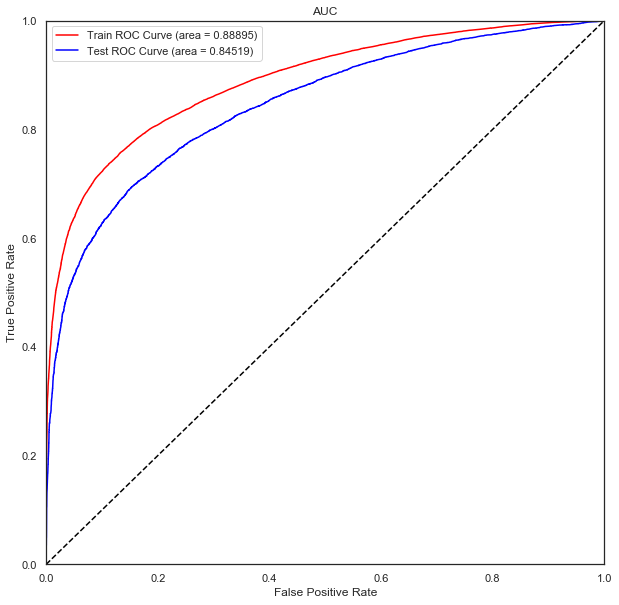

In [50]:
plot_roc_curve(y_train, y_pred_train, y_test, y_pred_test)

## LightGBM

In [51]:
import lightgbm as gbm
from lightgbm import LGBMClassifier

In [52]:
gbm_clf = gbm.LGBMClassifier(boosting_type = 'gbdt',
                             #num_leaves = ,
                             #max_depth = ,
                             learning_rate = 0.1
                             #n_estimators = 
                             #,subsample_for_bin =
                             ,objective = 'binary'
                             ,metric = 'binary_logloss'
                         #,class_weight = 
                         #,min_split_gain =
                         #,min_split_weight =
                         #,min_child_weight =
                         #,min_child_samples =
                         #,subsample =
                         #,subsample_freq =
                         #,colsample_bytree =
                         ,reg_alpha = 5
                         ,reg_lambda = 120
                         ,importance_type = 'split' #will rank features by # of times it is used in model.'gain' for gain
                             ,num_iterations = 1000
                       )

In [53]:
gbm_clf.fit(x_train, y_train, eval_metric = 'result', verbose = True, eval_set = [(x_val, y_val)],
            early_stopping_rounds = 20)

D:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.662861
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.637722
[3]	valid_0's binary_logloss: 0.616462
[4]	valid_0's binary_logloss: 0.598544
[5]	valid_0's binary_logloss: 0.583187
[6]	valid_0's binary_logloss: 0.570031
[7]	valid_0's binary_logloss: 0.558754
[8]	valid_0's binary_logloss: 0.54899
[9]	valid_0's binary_logloss: 0.540151
[10]	valid_0's binary_logloss: 0.532668
[11]	valid_0's binary_logloss: 0.525932
[12]	valid_0's binary_logloss: 0.520214
[13]	valid_0's binary_logloss: 0.515268
[14]	valid_0's binary_logloss: 0.510909
[15]	valid_0's binary_logloss: 0.506911
[16]	valid_0's binary_logloss: 0.503441
[17]	valid_0's binary_logloss: 0.500306
[18]	valid_0's binary_logloss: 0.497588
[19]	valid_0's binary_logloss: 0.495152
[20]	valid_0's binary_logloss: 0.492824
[21]	valid_0's binary_logloss: 0.490803
[22]	valid_0's binary_logloss: 0.48906
[23]	valid_0's binary_logloss: 0.487419
[24]	valid_0's binary_logloss:

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='binary_logloss', min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_iterations=1000, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=5,
               reg_lambda=120, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [54]:
y_pred_test = gbm_clf.predict_proba(x_test)[:, 1]
y_pred_train = gbm_clf.predict_proba(x_train)[:, 1]
important_stats(y_train, y_pred_train, "train result summary: ")
important_stats(y_test, y_pred_test, "test result summary: ")

------------------------------------------
train result summary: 
recall: 0.7247920665387076
f1_score: 0.770344933104398
accuracy_score: 0.7831516766457454
AUC: 0.8630115360217185
Predicted      0      1    All
True                          
0          11015   8740  19755
1          11121   8919  20040
All        22136  17659  39795
------------------------------------------
------------------------------------------
test result summary: 
recall: 0.7157407407407408
f1_score: 0.7611597374179432
accuracy_score: 0.7757345387302239
AUC: 0.853773792999218
Predicted     0     1   All
True                       
0          1091   882  1973
1          1135   902  2037
All        2226  1784  4010
------------------------------------------


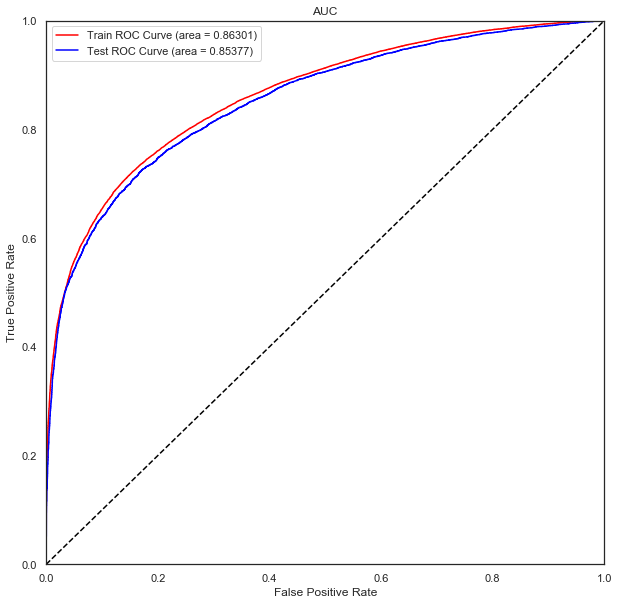

In [55]:
plot_roc_curve(y_train, y_pred_train, y_test, y_pred_test)

## GridSearch for GBDT

In [56]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                                               min_samples_leaf=20,max_depth=8,max_features='sqrt',
                                                               subsample=0.8,random_state=10), 
                        param_grid = param_test1, scoring='roc_auc',iid=False,cv=5)
gsearch1.fit(df.drop(columns = ['result','duration']),df['result'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([1.28124957, 1.86105089, 2.35116215, 2.79445329, 3.23824983,
         3.63047853, 3.9443975 ]),
  'std_fit_time': array([0.01327537, 0.01108432, 0.05870701, 0.04424052, 0.04514679,
         0.04517488, 0.0829081 ]),
  'mean_score_time': array([0.02654858, 0.03528886, 0.04479713, 0.05082083, 0.05753279,
         0.06280975, 0.06746578]),
  'std_score_time': array([0.00043411, 0.00048483, 0.00153323, 0.00089393, 0.00079637,
         0.00023958, 0.00099847]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80}],
  'split0_test_score': array([0.84822848, 0.8501402 , 0.85125766, 0.85173018, 0.85229508,
         0.85250405, 0.85259305]),
  'spl

In [57]:
param_test1 = {'n_estimators':range(80,151,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                                               min_samples_leaf=20,max_depth=8,max_features='sqrt',
                                                               subsample=0.8,random_state=10), 
                        param_grid = param_test1, scoring='roc_auc',iid=False,cv=5)
gsearch1.fit(df.drop(columns = ['result','duration']),df['result'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([3.95342145, 4.31894641, 4.72409406, 5.09156485, 5.52606392,
         5.97822428, 6.3562953 , 6.54012952]),
  'std_fit_time': array([0.07678317, 0.06233292, 0.08298913, 0.07263203, 0.05200394,
         0.13482311, 0.14584478, 0.05102233]),
  'mean_score_time': array([0.06815233, 0.0724474 , 0.07785802, 0.08179045, 0.08701043,
         0.09241605, 0.09763985, 0.10175829]),
  'std_score_time': array([1.28495032e-03, 7.43452556e-04, 8.07756235e-05, 9.02165608e-04,
         8.03120540e-04, 1.37377408e-03, 7.98770850e-04, 1.29443615e-03]),
  'param_n_estimators': masked_array(data=[80, 90, 100, 110, 120, 130, 140, 150],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 80},
   {'n_estimators': 90},
   {'n_estimators': 100},
   {'n_estimators': 110},
   {'n_estimators': 120},
   {'n_estimators': 130},
   {'n_estimators': 140},
   {'n_estimators': 150}],
  '

In [58]:
param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(100,801,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=120, min_samples_leaf=20,
                                                               max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(df.drop(columns = ['result','duration']),df['result'])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([ 2.39685931,  2.54591355,  2.49691129,  2.43694887,  3.71289501,
          4.11677957,  3.37368555,  3.3266284 ,  5.12266569,  4.63111467,
          4.56246095,  4.41190138,  7.20344133,  6.2032042 ,  5.6498208 ,
          5.43972406,  9.96055145,  7.71575594,  6.95246296,  6.59087243,
         12.81945477,  9.24645205,  8.02964244,  7.46146746]),
  'std_fit_time': array([0.03425323, 0.1133316 , 0.04191908, 0.05942264, 0.40346671,
         0.6515167 , 0.01621176, 0.03630038, 0.07953618, 0.06762619,
         0.05517554, 0.0533252 , 0.13404538, 0.07526966, 0.09154981,
         0.04431287, 0.14453355, 0.13990039, 0.08525143, 0.0687038 ,
         0.13262561, 0.05883254, 0.08568352, 0.13804373]),
  'mean_score_time': array([0.03942876, 0.04158697, 0.04031305, 0.0387188 , 0.05953069,
         0.05870275, 0.05628395, 0.05579648, 0.07903986, 0.07675195,
         0.07576947, 0.07517672, 0.10232067, 0.09955225, 0.0959847 ,
         0.09477296, 0.12827792, 0.12141242, 0.

In [59]:
param_test3 = {'min_samples_leaf':range(60,101,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=120,max_depth=7,
                                                               min_samples_split=700,
                                                               max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(df.drop(columns = ['result','duration']),df['result'])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([4.31443753, 4.2968925 , 4.35386248, 4.36604476, 4.27384934]),
  'std_fit_time': array([0.04067594, 0.08522925, 0.0323449 , 0.06072759, 0.0504708 ]),
  'mean_score_time': array([0.0753356 , 0.07558384, 0.07631717, 0.07660422, 0.07711883]),
  'std_score_time': array([0.00051565, 0.00107527, 0.00089104, 0.0005029 , 0.00077008]),
  'param_min_samples_leaf': masked_array(data=[60, 70, 80, 90, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_samples_leaf': 60},
   {'min_samples_leaf': 70},
   {'min_samples_leaf': 80},
   {'min_samples_leaf': 90},
   {'min_samples_leaf': 100}],
  'split0_test_score': array([0.85364489, 0.85312491, 0.85342736, 0.85336656, 0.85324267]),
  'split1_test_score': array([0.8562873 , 0.85550684, 0.8561399 , 0.85594652, 0.856218  ]),
  'split2_test_score': array([0.85232764, 0.85278165, 0.85216334, 0.85252303, 0.8525058 ]),
  'split3_test_score': array([0.8

In [60]:
gbdt_best = GradientBoostingClassifier(learning_rate=0.1, n_estimators=120,max_depth=7, min_samples_leaf =60, 
                                  min_samples_split =700, max_features='sqrt', subsample=0.8, random_state=10)
gbdt_best.fit(df.drop(columns = ['result','duration']),df['result'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=700,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [61]:
y_pred_test = gbdt_best.predict_proba(x_test)[:, 1]
y_pred_train = gbdt_best.predict_proba(x_train)[:, 1]
important_stats(y_train, y_pred_train, "train result summary: ")
important_stats(y_test, y_pred_test, "test result summary: ")

------------------------------------------
train result summary: 
recall: 0.7159948816378758
f1_score: 0.7680719273862837
accuracy_score: 0.7830232595470087
AUC: 0.8643141090491728
Predicted      0      1    All
True                          
0          11196   8559  19755
1          11268   8772  20040
All        22464  17331  39795
------------------------------------------
------------------------------------------
test result summary: 
recall: 0.7145061728395061
f1_score: 0.7671066438393991
accuracy_score: 0.7833881241010889
AUC: 0.8644232656777966
Predicted     0     1   All
True                       
0          1114   859  1973
1          1151   886  2037
All        2265  1745  4010
------------------------------------------


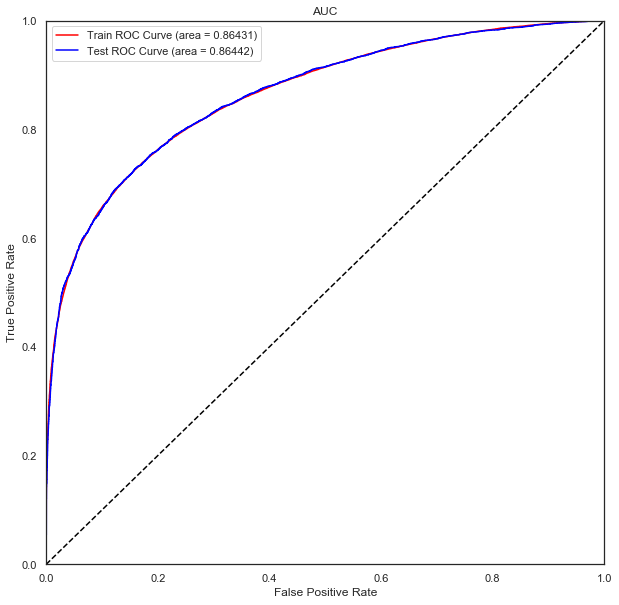

In [62]:
plot_roc_curve(y_train, y_pred_train, y_test, y_pred_test)

## Features importance

In [75]:
gbdt_importance = gbdt_best.feature_importances_

Text(0.5, 0, 'Relative Importance: Gini')

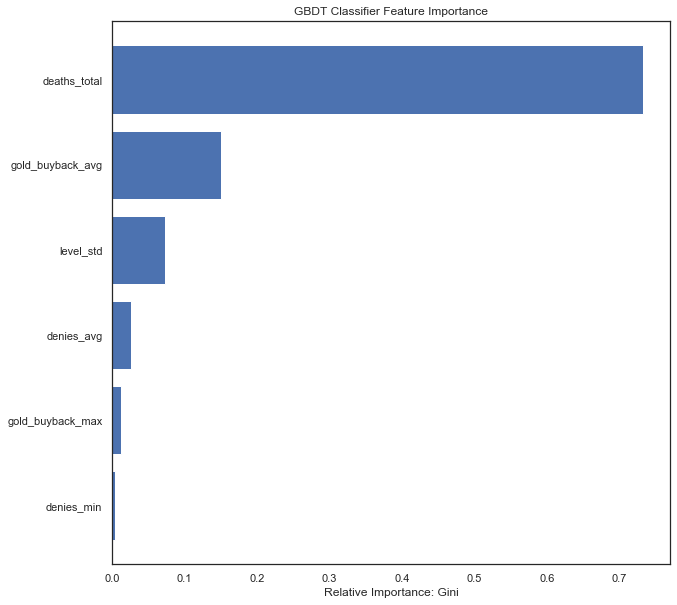

In [77]:
from matplotlib.pyplot import figure
figure(num=None, figsize = (10,10))
indices = np.argsort(gbdt_importance)
plt.figure(1)
plt.title('GBDT Classifier Feature Importance')
plt.barh(range(len(indices)), gbdt_importance[indices], color = 'b', align = 'center')
gbdt_feat_names = x_train.columns
plt.yticks(range(len(indices)), gbdt_feat_names[indices])
plt.xlabel('Relative Importance: Gini')

## Logistic Regression for predicting probabilities

In [79]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(solver = 'saga',
                           penalty = 'elasticnet',
                           l1_ratios = [0.1, 0.2, 0.3],
                           Cs = 20,
                           n_jobs = -1,
                           random_state = 0,
                           class_weight = 0.9
)
lr.fit(x_train,y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter wa

LogisticRegressionCV(Cs=20, class_weight=0.9, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=[0.1, 0.2, 0.3], max_iter=100,
                     multi_class='warn', n_jobs=-1, penalty='elasticnet',
                     random_state=0, refit=True, scoring=None, solver='saga',
                     tol=0.0001, verbose=0)

In [80]:
y_pred_test = lr.predict_proba(x_test)[:, 1]
y_pred_train = lr.predict_proba(x_train)[:, 1]
important_stats(y_train, y_pred_train, "train result summary: ")
important_stats(y_test, y_pred_test, "test result summary: ")

------------------------------------------
train result summary: 
recall: 0.5398912348048625
f1_score: 0.6377824805381301
accuracy_score: 0.6922805271521904
AUC: 0.7677302786258187
Predicted      0      1    All
True                          
0          12899   6856  19755
1          13041   6999  20040
All        25940  13855  39795
------------------------------------------
------------------------------------------
test result summary: 
recall: 0.5417695473251029
f1_score: 0.6383030303030303
accuracy_score: 0.6934456544072324
AUC: 0.7677087607714403
Predicted     0     1   All
True                       
0          1280   693  1973
1          1292   745  2037
All        2572  1438  4010
------------------------------------------


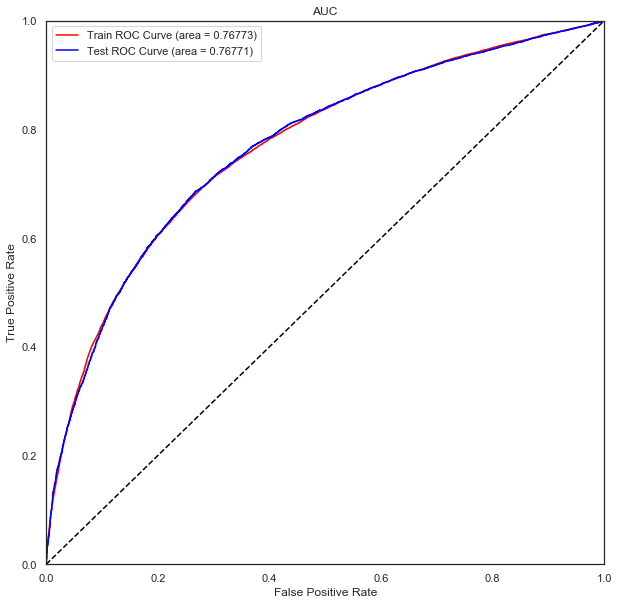

In [81]:
plot_roc_curve(y_train, y_pred_train, y_test, y_pred_test)